In [1]:

### Generate a Dummy Dataset

import pandas as pd
import numpy as np
from datetime import timedelta, datetime

# Create a date range
date_range = pd.date_range(start='2024-01-01', end='2024-03-31', freq='D')

# Number of hotels
n_hotels = 10

# Create dummy data
data = []
for hotel_id in range(n_hotels):
    for date in date_range:
        total_rooms = np.random.randint(50, 200)
        rooms_booked = np.random.randint(0, total_rooms + 1)
        fully_booked = 1 if rooms_booked == total_rooms else 0
        data.append({
            'date': date,
            'hotel_id': hotel_id,
            'number_of_rooms_booked': rooms_booked,
            'total_rooms': total_rooms,
            'is_fully_booked': fully_booked
        })

# Convert list to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('./hotels_data.csv', index=False)


In [2]:
# Load data
import pandas as pd
data=pd.read_csv("hotels_data.csv")


In [6]:
# Data Transformations

## a. feature engineering:
data['booking_rate']=data['number_of_rooms_booked'] / data['total_rooms']

data['date']=pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['day_of_week'] = data['date'].dt.dayofweek


## b. Normalization - Standardization of the booking rate
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data[['booking_rate']] = scaler.fit_transform(data[['booking_rate']])

In [7]:
# Data Cleaning
data.fillna(data.median(),  inplace=True)
data.fillna('Unknown', inplace=True)
data.drop_duplicates(inplace=True)

In [8]:
# Encoding Categorical Data - One-hot encoding
data=pd.get_dummies(data, columns=['month', 'day_of_week'], drop_first=True)

In [9]:
data.head()

,date,hotel_id,number_of_rooms_booked,total_rooms,is_fully_booked,booking_rate,month_2,month_3,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,2024-01-01,0,31,76,0,-0.296312,False,False,False,False,False,False,False,False
1,2024-01-02,0,137,144,0,1.570647,False,False,True,False,False,False,False,False
2,2024-01-03,0,100,152,0,0.562464,False,False,False,True,False,False,False,False
3,2024-01-04,0,59,105,0,0.232728,False,False,False,False,True,False,False,False
4,2024-01-05,0,103,112,0,1.461596,False,False,False,False,False,True,False,False


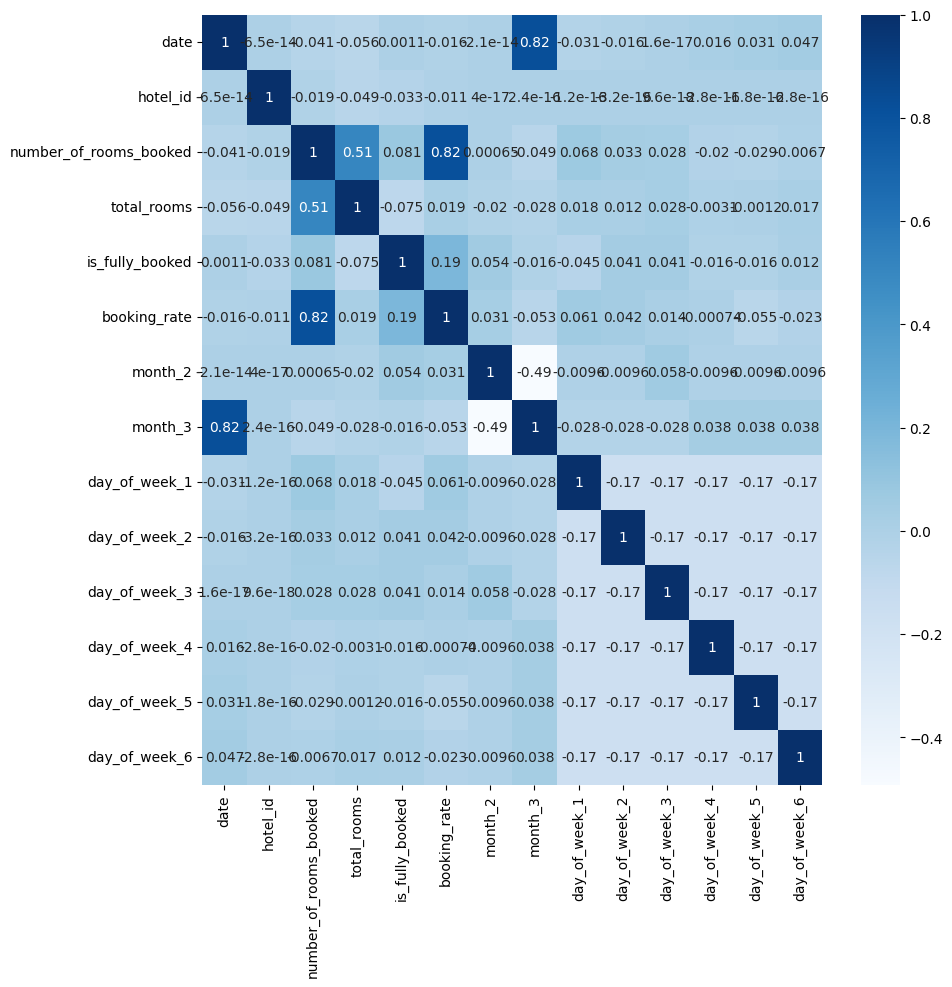

In [10]:
# Feature Selections
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
correlation_matrix=data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Blues)
plt.show()


# Droping highly correlated data
# it depends on the plot obtained

In [11]:
# Feature and target separation
X = data.drop(['hotel_id', 'date', 'is_fully_booked', 'number_of_rooms_booked', 'total_rooms'], axis=1)
y = data['is_fully_booked']


In [12]:
# Data partitioning
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [14]:
# Model Evaluation
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.989010989010989
